Contents:
1. <a href=#data_dir>Set working dir and Clone from git hub(for first time)</a><br>
2. <a href=#data_pipeline>Data Pipeline</a><br>
3. <a href=#train>Train</a><br>
4. <a href=#results>Results</a>
5. <a href=#viz_differences>Visualizing Prediction differences at different softmaxes</a><br>
6. <a href=#viz_good_bad>Visualizing highly confidenct correct and incorrect predictions</a><br>


In [1]:
%tensorflow_version 1.x
import numpy as np

import tensorflow as tf

import numpy as np
import time, math
from tqdm import tqdm_notebook as tqdm


import tensorflow.contrib.eager as tfe
tf.enable_eager_execution()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



<a name=data_dir></a>

# Data Directory Set Up. 
Clone from git if running for first time. Else git pull

In [2]:
import os
os.getcwd()
from google.colab import drive
import os
drive.mount('/content/gdrive')

#IF YOU ARE CLONING FOR THE FIRST TIME in colab please uncomment all the below 5 lines of code. 
#Put git user name and password in appropriate places

#root_path = 'gdrive/My Drive/Colab Notebooks/' #change dir to folder where you want to clone
#os.chdir('/content/' + root_path)
#!git clone https://<UR_GIT_USERNAME>:<GIT_PASSWORD>@github.com/selfishhari/eva_research_team4.git
#!git branch -r | grep -v '\->' | while read remote; do git branch --track "${remote#origin/}" "$remote"; done
#!git checkout zeedense


root_path = 'gdrive/My Drive/Colab Notebooks/eva_research_team4/src/' #change dir to your project folder's src

os.chdir('/content/' + root_path)
os.getcwd()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


'/content/gdrive/My Drive/Colab Notebooks/eva_research_team4/src'

In [3]:
!git branch
#YOU NEED TO BE ON "zeedense" branch

  augmentation
  densenext
  development
  master
  tfrecords_fix
* zeedense


In [4]:
!git pull

remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 0), reused 1 (delta 0), pack-reused 0
Unpacking objects: 100% (5/5), done.
From https://github.com/selfishhari/eva_research_team4
   195531a..7b7b77e  zeedense   -> origin/zeedense
Updating 195531a..7b7b77e
Fast-forward
 src/davidnet_v2.py     | 6 ++++--
 src/test_run_script.py | 9 ++++++++-
 2 files changed, 12 insertions(+), 3 deletions(-)


In [5]:
#from all_models import DavidNet


import run_util


from importlib import reload
reload(run_util)

from run_util import Run

import data_pipeline

reload(data_pipeline)

from davidnet_v2 import DavidNetMultiSoft

from augmentation_utils import cutout

Using TensorFlow backend.



32 conv0.8003070154231878 (3, 3) (1, 1) same (1, 1) None glorot_uniform
32 conv0.8003070154231878 (3, 3) (1, 1) same (1, 1) None glorot_uniform
32 conv0.8003070154231878 (3, 3) (1, 1) same (1, 1) None glorot_uniform


<a name=data_pipeline></a>

# Data Pipeline

In [6]:
data_pipeline.get_data(dataset_name = "CIFAR10", tfrecords_flag=True)

saving to tf records
Instructions for updating:
Please write your own downloading logic.
Generating ../data/train/train.tfrecords


Generating ../data/eval/eval.tfrecords
getting tf records complete


######

In [0]:
train_mean = np.array([125.30691805, 122.95039414, 113.86538318])

train_std= np.array([62.99321928, 62.08870764, 66.70489964])

normalize = lambda x: ((x - train_mean) / train_std)

def data_aug_train(x, y):
    
    #x = tf.image.per_image_standardization(x)
    
    x = normalize(x)
        
    #x = tf.image.random_flip_left_right(x)
    
    paddings = [(4, 4), (4, 4), (0, 0)]
    
    x = tf.pad(x, paddings, "REFLECT")
    
    x = tf.random_crop(x, [32, 32, 3])

    x = tf.image.random_flip_left_right(x)

    x = cutout(x)
    
    return (x, y)
  
def data_aug_test(x, y):
    
    #x = tf.image.per_image_standardization(x)
    
    x = normalize(x)
        
    #x = tf.image.random_flip_left_right(x)
    
    #paddings = [(4, 4), (4, 4), (0, 0)]
    
    #x = tf.pad(x, paddings, "REFLECT")
    
    #x = tf.random_crop(x, [32, 32, 3])
    
    return (x, y)

<a name=train></a>

# Train

In [0]:
obj = Run()

In [0]:
BATCH_SIZE = 512 #@param {type:"integer"}
MOMENTUM = 0.9 #@param {type:"number"}

MIN_MOMENTUM = 0.9 #@param {type:"number"}
LEARNING_RATE = 0.4 #@param {type:"number"}
WEIGHT_DECAY = 5e-4 #@param {type:"number"}
EPOCHS = 24 #@param {type:"integer"}

CLR_FLAG = 0 #@param {type:"integer"}
      
NUM_EPOCHS_PER_CYCLE = 3 #@param {type:"number"}

HIGHEST_LR_EPOCH = 5#@param {type:"integer"}


MIN_LEARNING_RATE = 0.0000001 #@param {type:"number"}

END_LR_SMOOTHING_PERC = 0.15 #@param {type:"number"}

COMMENTS = "Davidnet multi_inference voting accuracy" #@param {type:"string"}


params_tune = {
    
  "epochs":EPOCHS, 
 
  "batch_size" : BATCH_SIZE,
    
  "num_epochs_per_cycle":NUM_EPOCHS_PER_CYCLE,
  
  "clr_flag":CLR_FLAG,

  "max_lr": LEARNING_RATE,

  "min_lr":MIN_LEARNING_RATE,

  "end_anneal_pc":END_LR_SMOOTHING_PERC,

  "max_mom":MOMENTUM,
 
  "min_mom":MIN_MOMENTUM,
    
  "highest_lr_epoch" : HIGHEST_LR_EPOCH,
 
  "wd":WEIGHT_DECAY,
  
  "skip_testing_epochs":0,
    
  "batches_per_epoch":50000//BATCH_SIZE,
    
  "comments":COMMENTS
}

In [0]:
loaded_tfrecs = data_pipeline.load_tfrecords(params_tune["batch_size"])

train_dataset = loaded_tfrecs["train"]

eval_dataset = loaded_tfrecs["eval"]

In [0]:
def tst_data_supplier(epoch_num):
    
    batch_size = params_tune["batch_size"]
    
    global eval_dataset
  
    len_test = 10000

    test_set = eval_dataset.map(data_aug_test).batch(batch_size).prefetch(1)
    
    return (test_set, len_test)

def trn_data_supplier(epoch_num):
    
    batch_size = params_tune["batch_size"]
  
    global train_dataset
    
    len_train = 50000

    train_set = train_dataset.map(data_aug_train).batch(batch_size).prefetch(1)
    
    return (train_set, len_train)

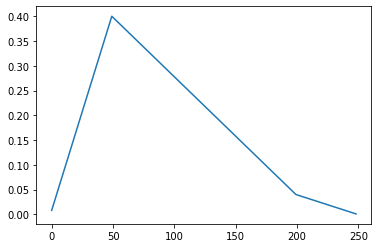

In [12]:
obj.plot_lr(params_tune)

In [13]:
#import cProfile
model2 = DavidNetMultiSoft(f_filter=64,  
                     multisoft_list = [0, 1, 2],
                     residual_strategy = [True, True, True]
                    )
x = obj.run(params_tune, trn_data_supplier, tst_data_supplier, model = model2)

64 conv0.8003070154231878 (3, 3) (1, 1) same (1, 1) None glorot_uniform
128 conv0.8003070154231878 (3, 3) (1, 1) same (1, 1) None glorot_uniform
128 conv0.8003070154231878 (3, 3) (1, 1) same (1, 1) None glorot_uniform
128 conv0.8003070154231878 (3, 3) (1, 1) same (1, 1) None glorot_uniform
256 conv0.8003070154231878 (3, 3) (1, 1) same (1, 1) None glorot_uniform
256 conv0.8003070154231878 (3, 3) (1, 1) same (1, 1) None glorot_uniform
256 conv0.8003070154231878 (3, 3) (1, 1) same (1, 1) None glorot_uniform
512 conv0.8003070154231878 (3, 3) (1, 1) same (1, 1) None glorot_uniform
512 conv0.8003070154231878 (3, 3) (1, 1) same (1, 1) None glorot_uniform
512 conv0.8003070154231878 (3, 3) (1, 1) same (1, 1) None glorot_uniform



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
epoch: 1 lr: 0.08 train loss: 2.826 train acc:0.412 val loss: 2.666 val acc: 0.455 time:87.860
epoch: 2 lr: 0.16 train loss: 1.925 train acc:0.620 val loss: 1.747 val acc: 0.646 time:162.400
epoch: 3 lr: 0.24 train loss: 1.493 train acc:0.714 val loss: 1.326 val acc: 0.753 time:235.940
epoch: 4 lr: 0.32 train loss: 1.282 train acc:0.754 val loss: 1.492 val acc: 0.703 time:310.636
epoch: 5 lr: 0.4 train loss: 1.125 train acc:0.787 val loss: 0.987 val acc: 0.821 time:386.280
epoch: 6 lr: 0.376 train loss: 0.977 train acc:0.819 val loss: 0.971 val acc: 0.809 time:460.888
epoch: 7 lr: 0.35200000000000004 train loss: 0.848 train acc:0.847 val loss: 0.858 val acc: 0.841 time:535.049
epoch: 8 lr: 0.328 train loss: 0.765 train acc:0.866 val loss: 0.862 val acc: 0.829 time:609.155
epoch: 9 lr: 0.30400000000000005 train loss: 0.698 train acc:0.879 val loss: 0.724 val acc: 0.863 time:682.874
epoch: 10 l

<a name=results></a>

# Results

In [21]:
early_inf_df = run_util.early_inference_accuracy(obj.model,test_dataset = tst_data_supplier)

early_inf_df

,sm_level,accuracy,loss,inference_time
0,sm1,0.490046,0.8336,0.000174
1,sm2,0.241785,0.9168,0.000274
2,sm3,0.221079,0.9320,0.000357


In [0]:
import visual_utils
reload(visual_utils)
#diff_df = visual_utils.grab_different_imgs(obj.model, trn_data_supplier)

all_df = visual_utils.grab_different_imgs(obj.model, trn_data_supplier, difference=False)

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
diff_df = all_df

diff_df["subset_diff"] = False

diff_df["subset_diff"] = (diff_df["subset_diff"]) | (diff_df.sm1_correct != diff_df.sm3_correct)

diff_df["subset_diff"] = (diff_df["subset_diff"]) | (diff_df.sm2_correct != diff_df.sm3_correct)

diff_df = diff_df.loc[diff_df.subset_diff==True,:].copy()

In [23]:
all_df.head(3)

,ys,subset,sm3_class,sm3_probs,sm3_correct,sm1_probs,sm1_class,sm1_correct,sm2_probs,sm2_class,sm2_correct,imgs,subset_diff
0,8,True,8,0.999946,True,0.992047,8,True,0.997697,8,True,"[[[0.72536516, 0.90273434, 1.0514162], [0.8047...",False
1,2,True,2,0.999971,True,0.673968,2,True,0.998639,2,True,"[[[0.77298933, 0.75778043, 0.8115537], [0.7571...",False
2,4,True,4,0.921624,True,0.906078,4,True,0.933108,4,True,"[[[-0.7033601, -0.45016873, -0.6576036], [-0.6...",False


Final confusion matrix-at softmax3


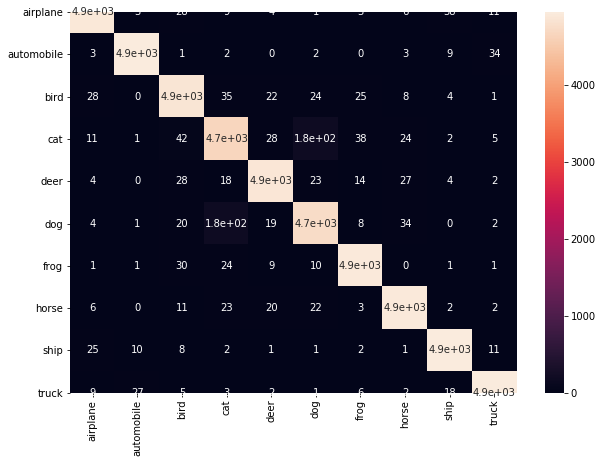

In [24]:
print("Final confusion matrix-at softmax3")
visual_utils.plot_cm(all_df.ys, all_df.sm3_class)

Confusion matrix-at softmax1


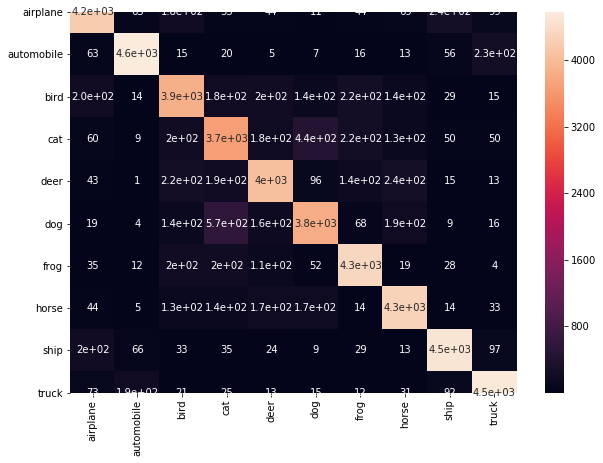

In [25]:
print("Confusion matrix-at softmax1")
visual_utils.plot_cm(all_df.ys, all_df.sm1_class)

Confusion matrix-at softmax2


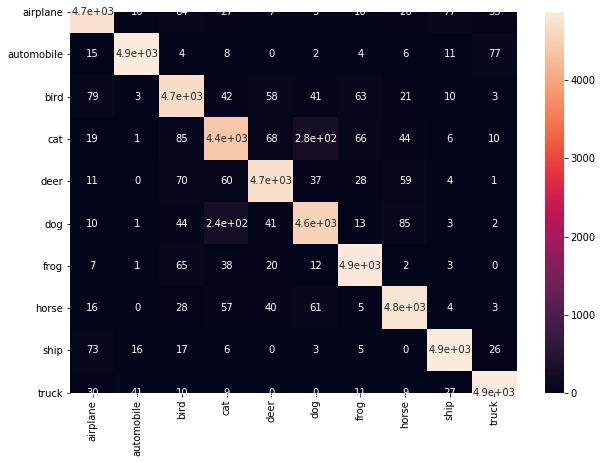

In [26]:
print("Confusion matrix-at softmax2")
visual_utils.plot_cm(all_df.ys, all_df.sm2_class)

**Voting accuracy**

In [27]:
print("Accuracy calculated by voting results from 3 softmaxes.\n \
Mode of predicted class is taken, if all3 are different then the last softmax prediction is taken\n")
run_util.voting_accuracy(df=all_df, true_col="ys", sm_class_colnames = ["sm1_class", "sm2_class", "sm3_class"])

Accuracy calculated by voting results from 3 softmaxes.
 Mode of predicted class is taken, if all3 are different then the last softmax prediction is taken



0.9605

<a name=viz_differences></a>

# Visualizing Images. Difference b/w softmax1 and softmax3

This set of viz has images with the following property

1. All images where softmax1 is doing incorrectly but softmax3 is correct
2. All images where softmax1 is doing correctly but softmax3 is not



These are plotted one next to other for each class

In [0]:
print("last softmax is softmax3, considered softmax is softmax1\n\
predicted1 and prob1-softmax1\n\
predicted2 and prob2-softmax2\n\
predicted3 and prob3-softmax3\n\
")
visual_utils.plot_diff(diff_df, sm_col="sm1_correct", main_col="sm3_correct",
                       denormalize=True, ncols=20)

# Visualizing Images. Difference b/w softmax2 and softmax3

This set of viz has images with the following property

1. All images where softmax2 is doing incorrectly but softmax3 is correct
2. All images where softmax2 is doing correctly but softmax3 is not



These are plotted one next to other for each class

In [0]:
print("last softmax is softmax3, considered softmax is softmax2\n\
predicted1 and prob1-softmax1\n\
predicted2 and prob2-softmax2\n\
predicted3 and prob3-softmax3\n\
")

visual_utils.plot_diff(diff_df,
                       sm_col="sm2_correct", main_col="sm3_correct",
                       img_col="imgs",
              true_col="ys", 
              ncols=10,
              denormalize=True)

<a name=viz_good_bad></a>

# Good and Worse Predictions
In this set of viz, images have following properties

1. For a given softmax, predictions that are both correct and have high probability(Highly confident correct predictions)

2. For a given softmax, predictions that are highly confident but for a wrong class.

These are plotted row by for each class

In [0]:
!git pull
reload(visual_utils)

**Softmax1- Good and worse predictions**

In [0]:
visual_utils.plot_good_and_worst(df=all_df, sm_col="sm1_correct", sm_class="sm1_class", sm_prob="sm1_probs",
              img_col="imgs",
              true_col="ys", 
              ncols=10,
              denormalize=True,
              CLASSWISE_SELECT_TOP_IMAGES = 10)

**Confusion matrix for softmax1**

In [0]:
visual_utils.plot_cm(all_df.ys, all_df.sm1_class)

**Softmax2- Good and worse predictions**

In [0]:
print("\
predicted1 and prob1-softmax1\n\
predicted2 and prob2-softmax2\n\
predicted3 and prob3-softmax3\n\
")

visual_utils.plot_good_and_worst(df=all_df, sm_col="sm2_correct", sm_class="sm2_class", sm_prob="sm2_probs",
              img_col="imgs",
              true_col="ys", 
              ncols=10,
              denormalize=True,
              CLASSWISE_SELECT_TOP_IMAGES = 10)

**Confusion matrix for softmax2**

In [0]:
visual_utils.plot_cm(all_df.ys, all_df.sm2_class)

# Logs

In [19]:
import pandas as pd

pd.read_csv("../data/run_logger.csv").tail()

,total_model_parameters,epochs,batch_size,max_lr,min_lr,anneal_perc,max_mom,min_mom,time_taken,train_acc,test_acc,wd,train_loss,test_loss,runs,log_time,comments
128,7753792,24,512,0.4,0.000001,0.15,0.9,0.9,1684.865651,0.99144,0.9190,0.0005,0.031434,0.281703,"{'epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ...",2019-10-26 09:42:47,"Zeedensenet multisoftmax, gap on channels, mul..."
129,7753792,24,512,0.4,0.000001,0.15,0.9,0.9,1672.543345,0.97480,0.9270,0.0005,0.077110,0.233861,"{'epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ...",2019-10-26 10:13:04,"Zeedensenet multisoftmax, gap on channels, mul..."
130,6573120,24,512,0.4,0.000001,0.15,0.9,0.9,1506.610169,0.97014,0.9242,0.0005,0.093151,0.234870,"{'epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ...",2019-10-26 10:39:26,"Zeedensenet multisoftmax, gap on channels, mul..."
131,7764288,14,256,0.4,0.000001,0.15,0.9,0.9,2698.666154,0.93652,0.9123,0.0005,0.468918,0.538113,"{'epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ...",2019-10-26 12:52:29,"Zeedensenet multisoftmax, gap on channels, mul..."
132,7776448,14,256,0.4,0.000001,0.15,0.9,0.9,3265.721450,0.93866,0.9136,0.0005,0.428544,0.522061,"{'epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ...",2019-10-26 14:46:25,"Zeedensenet multisoftmax, gap on channels, mul..."


In [0]:
obj.model.summary()